# Breast Cancer Classification

In this notebook I will look at a dataset containing 569 cases of breast cancer.

Using a logistic regression model, we will aim to predict whether the cancerous tumors is malignant or benign.

*The documentation can be found on: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer* 

*Same data from UCI ML: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)*

In [2]:
# General
import pandas as pd

# Ignoring warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data viz
import seaborn as sn
import matplotlib.pyplot as plt

# Logistic regression
from sklearn.linear_model import LogisticRegression

# Confusion matrix
from sklearn.metrics import confusion_matrix

# Spilitting data; train & test
from sklearn.model_selection import train_test_split

In [3]:
# Importing dataset from SkLearn
from sklearn.datasets import load_breast_cancer

In [4]:
# Store dataset in a variable
breast_cancer = load_breast_cancer()

# Let's see what our data looks like
print(f"The 2d array looks like: {breast_cancer.data[1]}")
print("-----------------------------------------")
print(f"The data has: {breast_cancer.data[1].shape} different classes")
print("-----------------------------------------")
print(f"Our data's target names are: {breast_cancer.target_names}")
print("-----------------------------------------")
print(f"Our data's feature names are: {breast_cancer.feature_names}")

The 2d array looks like: [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02]
-----------------------------------------
The data has: (30,) different classes
-----------------------------------------
Our data's target names are: ['malignant' 'benign']
-----------------------------------------
Our data's feature names are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst 

In [7]:
breast_cancer.data.shape

(569, 30)

In [23]:
# Let's see the shape of the data
breast_cancer.data.shape

(569, 30)

In [44]:
# Splitting data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(breast_cancer.data, breast_cancer.target, test_size = 0.2)

In [55]:
# Storing our model
bc_log = LogisticRegression()

In [56]:
# Fitting our model 
bc_log.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
# Getting our model score
bc_log.score(xtest, ytest) # Our model is pretty accurate = 96.49%

0.9649122807017544

#### Testing our model vs .target[]

Let's do a few examples to compare the scikit function of; .target[] vs. using our model to predict a result using a range of variables.

This will:

    1) Allow us to test our model
    2) See if our model misses a prediction 
    
##### First Test - Fixed Dimensions

In [58]:
# Let's get the feature values for case #150
breast_cancer.data[150]

array([1.300e+01, 2.078e+01, 8.351e+01, 5.194e+02, 1.135e-01, 7.589e-02,
       3.136e-02, 2.645e-02, 2.540e-01, 6.087e-02, 4.202e-01, 1.322e+00,
       2.873e+00, 3.478e+01, 7.017e-03, 1.142e-02, 1.949e-02, 1.153e-02,
       2.951e-02, 1.533e-03, 1.416e+01, 2.411e+01, 9.082e+01, 6.167e+02,
       1.297e-01, 1.105e-01, 8.112e-02, 6.296e-02, 3.196e-01, 6.435e-02])

In [69]:
# Let's see what class case #150 is
breast_cancer.target[150]

1

In [70]:
# Let's see if our model predicts the same class
bc_log.predict([[1.300e+01, 2.078e+01, 8.351e+01, 5.194e+02, 1.135e-01, 7.589e-02,
                        3.136e-02, 2.645e-02, 2.540e-01, 6.087e-02, 4.202e-01, 1.322e+00,
                        2.873e+00, 3.478e+01, 7.017e-03, 1.142e-02, 1.949e-02, 1.153e-02,
                        2.951e-02, 1.533e-03, 1.416e+01, 2.411e+01, 9.082e+01, 6.167e+02,
                        1.297e-01, 1.105e-01, 8.112e-02, 6.296e-02, 3.196e-01, 6.435e-02]])

array([1])

##### Second Test - Fixed Dimensions

In [71]:
# Let's get the feature values for case #470
breast_cancer.data[470]

array([9.667e+00, 1.849e+01, 6.149e+01, 2.891e+02, 8.946e-02, 6.258e-02,
       2.948e-02, 1.514e-02, 2.238e-01, 6.413e-02, 3.776e-01, 1.350e+00,
       2.569e+00, 2.273e+01, 7.501e-03, 1.989e-02, 2.714e-02, 9.883e-03,
       1.960e-02, 3.913e-03, 1.114e+01, 2.562e+01, 7.088e+01, 3.852e+02,
       1.234e-01, 1.542e-01, 1.277e-01, 6.560e-02, 3.174e-01, 8.524e-02])

In [72]:
# Let's see what class case #470 is
breast_cancer.target[470]

1

In [73]:
# Let's see if our model predicts the same class
bc_log.predict([[9.667e+00, 1.849e+01, 6.149e+01, 2.891e+02, 8.946e-02, 6.258e-02,
                 2.948e-02, 1.514e-02, 2.238e-01, 6.413e-02, 3.776e-01, 1.350e+00,
                 2.569e+00, 2.273e+01, 7.501e-03, 1.989e-02, 2.714e-02, 9.883e-03,
                 1.960e-02, 3.913e-03, 1.114e+01, 2.562e+01, 7.088e+01, 3.852e+02,
                 1.234e-01, 1.542e-01, 1.277e-01, 6.560e-02, 3.174e-01, 8.524e-02]])

array([1])

##### Third Test - Fixed Dimensions

In [74]:
# Let's get the feature values for case #5
breast_cancer.data[5]

array([1.245e+01, 1.570e+01, 8.257e+01, 4.771e+02, 1.278e-01, 1.700e-01,
       1.578e-01, 8.089e-02, 2.087e-01, 7.613e-02, 3.345e-01, 8.902e-01,
       2.217e+00, 2.719e+01, 7.510e-03, 3.345e-02, 3.672e-02, 1.137e-02,
       2.165e-02, 5.082e-03, 1.547e+01, 2.375e+01, 1.034e+02, 7.416e+02,
       1.791e-01, 5.249e-01, 5.355e-01, 1.741e-01, 3.985e-01, 1.244e-01])

In [75]:
# Let's see what class case #5 is
breast_cancer.target[5]

0

In [76]:
# Let's see if our model predicts the same class
bc_log.predict([[1.245e+01, 1.570e+01, 8.257e+01, 4.771e+02, 1.278e-01, 1.700e-01,
                 1.578e-01, 8.089e-02, 2.087e-01, 7.613e-02, 3.345e-01, 8.902e-01,
                 2.217e+00, 2.719e+01, 7.510e-03, 3.345e-02, 3.672e-02, 1.137e-02,
                 2.165e-02, 5.082e-03, 1.547e+01, 2.375e+01, 1.034e+02, 7.416e+02,
                 1.791e-01, 5.249e-01, 5.355e-01, 1.741e-01, 3.985e-01, 1.244e-01]])

array([0])

#### What can we see from our tests?
##### Test 1 - Case #150:
- The true class of case #150 was: 1 - Benign
- Our predicted class of case #150 was: 1 - Benign

##### Test 2 - Case #470:
- The true class of case #470 was: 1 - Benign
- Our predicted class of case #470 was: 1 - Benign

##### Test 3 - Case #5:
- The true class of case #5 was: 0 - Malignant
- Our predicted class of case #5 was: 0 - Malignant

We can see that our model is fairly accurate.

### Confusion Matrix

Let's create a confusion matrix to visualise where our model predicts the true values and when it misses.

In [77]:
# Storing the predicted values to plot against the true values
bc_y_predicted = bc_log.predict(xtest)

# Fitting confusion matrix
bc_cm = confusion_matrix(ytest, bc_y_predicted)
bc_cm

array([[38,  3],
       [ 1, 72]], dtype=int64)

Text(114.0, 0.5, 'True Values')

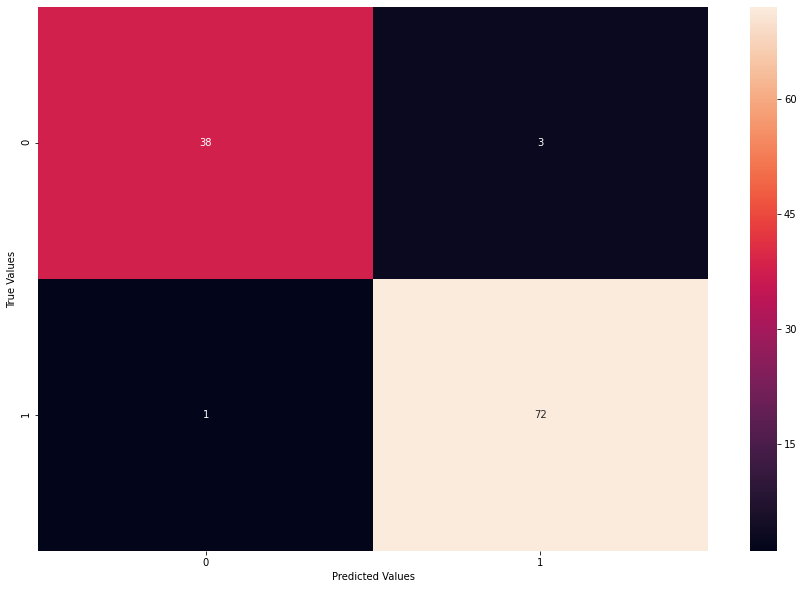

In [78]:
# Visualising the Confusion Matrix

# Setting graph size
plt.figure(figsize=(15,10))

# Plotting Confusion Matrix
sn.heatmap(bc_cm, annot=True)

# Setting graph labels
plt.xlabel("Predicted Values")
plt.ylabel("True Values")

#### What does this graph show?

- Where our model missed:
    - When the true value was 1, our model predicted 0 - *1 Instance*
    - When the true value was 0, our model predicted 1 - *3 Instances*
    
- Our model reflects a very strong accuracy score